# Aircraft Saftey Analysis


**Author:** Noah Meakins
***

# Overview

This in-depth analysis is intended to guide our company's foray into the commercial and private aviation sectors. By identifying historical safety risks and the most common causes of serious accidents, we aim to implement best practices and safety standards that surpass industry norms. This proactive approach to safety and risk analysis will be foundational in establishing our company as a responsible and trustworthy player in the aviation industry.

### Business Problem

My company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises but do not know anything about the potential risks of aircraft. I have been tasked with determining which aircraft are the lowest risk for the company to start this new business endeavor. With the data I will gather from the attached dataset, I will provide insights that will assist the head of the new aviation division, which can then use those insights to help decide which aircraft to purchase. Some specific data I will be analyzing at a deeper level are Country, Location, Make, Model, Number of Engines, Engine Type, Weather Conditions, Injury Severity, and Aircraft Damage. Some questions I will be asking myself during this analysis are:

1. Out of the columns that might have missing data, what methods should I implement for columns that I will need in my analysis? 
2. What Charts will be beneficial in presenting a visual representation of my analysis? 
3. How will I determine the safest and most profitable aircraft to invest in? 

These questions are important from a business perspective because if the data in my analysis is skewed due to missing data or data that doesn’t pertain to this analysis, it can negatively influence business decisions.  
***

### Data Understanding

- The data for this project was sourced from the National Transportation Safety Board and includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. It's relevant to our analysis as we aim to understand various aircraft models and the levels of saftey associated with them. 

- The dataset consists of individual aircraft accidents, each record detailing the accident. It includes data from incidents in the United States and international waters. Key variables include Country, Location, Make, Model, Number of Engines, Engine Type, Weather Conditions, Injury Severity, and Aircraft Damage. 

- For this analysis, in line with our company's focus on safety and risk assessment, the primary target variable is 'total fatal injuries'. Analyzing this variable will help us assess the severity of accidents and understand the safety challenges inherent in the aviation industry, especially pertinent to commercial and private flight operations.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200) # I wanted to see all the columns in the dataset when printing the dataframe
pd.set_option('max_rows', 20000) # I wanted to see as many rows as I needed to at any given time in the dataset when printing the dataframe
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/unit66/Downloads/AviationData.csv', encoding='latin-1', low_memory=False)

In [3]:
df.shape

(88889, 31)

In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [6]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Aviation Data 
The Aviation dataset consists of records from 1962 to 2023, and contains a large amount of information on Event Date, Location, Aircraft Damage, Injury Severity, and Total Fatal Injuries.

In [8]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Preparation

In preparation for this analysis, I will simplify our tasks by normalizing the column names and dropping anything we wont need. This will make things a bit easier to analyze. 


In [9]:
# Subsetting the data to only include the columns I want to work with and making a copy of the dataframe
df = df[[#'Event.Id', 
       'Investigation.Type', 
       # 'Accident.Number', 
       'Event.Date',
       'Location', 'Country', 
       # 'Latitude', 'Longitude', 'Airport.Code',
       # 'Airport.Name', 
       'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 
       # 'Registration.Number', 
       'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 
       # 'FAR.Description',
       # 'Schedule', 
       'Purpose.of.flight', 
       # 'Air.carrier', 
       'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 
       # 'Report.Status',
       #'Publication.Date'
       ]].copy()

In [10]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [11]:
df.dtypes

Investigation.Type                object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Broad.phase.of.flight             object
dtype: object

In [12]:
# Creating a function that takes the column names and returns a normalized version of it
def normalize_column_name(name):
    return name.strip().lower().replace(' ', '_').replace('.','_').replace('-','_')

In [13]:
# List comprehension to apply the function to all the column names
df.columns = [normalize_column_name(col) for col in df.columns]

In [14]:
# Verifying that the column names have been normalized
df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [15]:
df.isna().sum()

investigation_type            0
event_date                    0
location                     52
country                     226
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7077
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
dtype: int64

In [16]:
df.loc[df.duplicated()]

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
1371,Accident,1982-05-28,"EVANSVILLE, IN",United States,Non-Fatal,Substantial,Airplane,Cessna,172,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,7.0,VMC,Cruise
3082,Accident,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,Fatal(3),Destroyed,Helicopter,Bell,206B,Yes,1.0,Turbo Shaft,Unknown,3.0,0.0,0.0,0.0,VMC,Cruise
4761,Accident,1983-05-22,"BRIDGEPORT, CA",United States,Fatal(1),Substantial,NaN,Schempp-hirth,STANDARD CIRRUS,No,NaN,Unknown,Unknown,1.0,0.0,0.0,1.0,VMC,Cruise
7941,Accident,1984-04-13,"DELAND, FL",United States,Non-Fatal,Substantial,NaN,Cessna,172P,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,2.0,VMC,Taxi
8661,Accident,1984-06-18,"PORTLAND, AR",United States,Non-Fatal,Substantial,NaN,Snow,AT400,No,1.0,Turbo Prop,Aerial Application,0.0,0.0,0.0,2.0,VMC,Landing
13532,Accident,1985-11-30,"SAN PEDRO, CA",United States,Fatal(1),Destroyed,NaN,Bell,206L-1,No,1.0,Turbo Shaft,Unknown,1.0,4.0,7.0,0.0,VMC,Approach
19820,Incident,1988-03-10,"GREENSBORO, NC",United States,Incident,NaN,NaN,Boeing,737,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,159.0,VMC,Maneuvering
21077,Incident,1988-08-05,"ATLANTA, GA",United States,Incident,Minor,NaN,Douglas,DC-9-51,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,199.0,UNK,Taxi
22453,Incident,1989-03-01,"HOUSTON, TX",United States,Incident,NaN,NaN,Mcdonnell Douglas,DC-9-82,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,185.0,IMC,Approach
24878,Accident,1990-02-09,"TETERBORO, NJ",United States,Non-Fatal,Substantial,NaN,Mitsubishi,MU-2B-35,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,2.0,VMC,Taxi


In [17]:
# Dropping duplicated rows from the dataframe
df = df.drop_duplicates()

# Resetting the index of the dataframe
df.reset_index(drop=True, inplace=True)

In [18]:
# Verifying that the duplicated rows have been dropped
df.loc[df.duplicated()]

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight


In [19]:
# Filling missing values for numerical columns with 0
numerical_columns = ['total_fatal_injuries', 'total_serious_injuries', 
                     'total_minor_injuries', 'total_uninjured']
df[numerical_columns] = df[numerical_columns].fillna(0)

# Filling missing values for categorical columns with 'Unknown' or the most frequent value
categorical_columns = ['engine_type', 'purpose_of_flight', 'weather_condition', 
                       'broad_phase_of_flight']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Checking the updated dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88854 entries, 0 to 88853
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      88854 non-null  object        
 1   event_date              88854 non-null  datetime64[ns]
 2   location                88802 non-null  object        
 3   country                 88628 non-null  object        
 4   injury_severity         87856 non-null  object        
 5   aircraft_damage         85663 non-null  object        
 6   aircraft_category       32277 non-null  object        
 7   make                    88791 non-null  object        
 8   model                   88762 non-null  object        
 9   amateur_built           88752 non-null  object        
 10  number_of_engines       82774 non-null  float64       
 11  engine_type             88854 non-null  object        
 12  purpose_of_flight       88854 non-null  object

In [20]:
# Filtering out amateur-built aircraft
df = df[df['amateur_built'] == 'No']

# Focusing on recent data from 2000 onwards
df = df[df['event_date'] >= '2000-01-01']

df.head()


,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
47653,Accident,2000-01-01,"HOMESTEAD, FL",United States,Non-Fatal,Substantial,NaN,Cessna,550,No,2.0,Turbo Fan,Positioning,0.0,0.0,0.0,3.0,VMC,Cruise
47654,Accident,2000-01-01,"MONTEAGLE, TN",United States,Fatal(2),Destroyed,NaN,Bellanca,BL-17-30A,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
47655,Accident,2000-01-02,"VICTORVILLE, CA",United States,Non-Fatal,Substantial,NaN,Cessna,172G,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Cruise
47656,Accident,2000-01-02,"DOS PALOS, CA",United States,Non-Fatal,Substantial,NaN,Cessna,172A,No,1.0,Reciprocating,Instructional,0.0,0.0,1.0,0.0,VMC,Cruise
47657,Accident,2000-01-02,"CORNING, AR",United States,Non-Fatal,Substantial,NaN,Piper,PA-46-310P,No,1.0,Turbo Prop,Personal,0.0,0.0,0.0,5.0,VMC,Cruise


In [21]:
df.shape

(36429, 19)

In [22]:
df.isna().sum()

investigation_type            0
event_date                    0
location                     12
country                      16
injury_severity             997
aircraft_damage            2039
aircraft_category         11325
make                         45
model                        64
amateur_built                 0
number_of_engines          4634
engine_type                   0
purpose_of_flight             0
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

In [23]:
# Checking how much data is missing in each column as a percentage
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

investigation_type         0.000000
event_date                 0.000000
location                   0.032941
country                    0.043921
injury_severity            2.736831
aircraft_damage            5.597189
aircraft_category         31.087870
make                       0.123528
model                      0.175684
amateur_built              0.000000
number_of_engines         12.720635
engine_type                0.000000
purpose_of_flight          0.000000
total_fatal_injuries       0.000000
total_serious_injuries     0.000000
total_minor_injuries       0.000000
total_uninjured            0.000000
weather_condition          0.000000
broad_phase_of_flight      0.000000
dtype: float64


In [24]:
# List of columns to check for missing data
columns_to_check = ['location', 'country', 'make', 'model', 'amateur_built'].copy()

df = df.dropna(subset=columns_to_check)

df.reset_index(drop=True, inplace=True)

In [25]:
df.shape

(36334, 19)

In [26]:
df.isna().sum()

investigation_type            0
event_date                    0
location                      0
country                       0
injury_severity             976
aircraft_damage            2012
aircraft_category         11251
make                          0
model                         0
amateur_built                 0
number_of_engines          4571
engine_type                   0
purpose_of_flight             0
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

In [27]:
# Replacing all NaN values with 'Unknown' for aircraft_damage
df['aircraft_damage'] = df['aircraft_damage'].fillna('Unknown')

In [28]:
# Looking into the rows that have a value of 0.0 in the 'number_of_engines' column
df[df['number_of_engines'] == 0.0].head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
2062,Accident,2001-01-28,"WURTSBORO, NY",United States,Fatal(1),Substantial,NaN,Schempp-hirth,Discus CS,No,0.0,Unknown,Personal,1.0,0.0,0.0,0.0,VMC,Approach
2352,Accident,2001-04-08,"PEORIA, AZ",United States,Non-Fatal,Substantial,NaN,Schweizer,2-33A,No,0.0,Unknown,Business,0.0,0.0,1.0,1.0,VMC,Takeoff
2382,Accident,2001-04-14,"WILLIAMS, CA",United States,Fatal(1),Substantial,NaN,Schleicher,ASW-20,No,0.0,Unknown,Personal,1.0,0.0,0.0,0.0,VMC,Takeoff
2496,Accident,2001-05-05,"ADELANTO, CA",United States,Non-Fatal,Substantial,NaN,Schweizer,SGS 1-34,No,0.0,Unknown,Instructional,0.0,1.0,0.0,0.0,VMC,Approach
2533,Accident,2001-05-12,"NEW MILFORD, CT",United States,Non-Fatal,Substantial,NaN,Schweizer,SGS 1-26E,No,0.0,Unknown,Instructional,0.0,0.0,1.0,0.0,VMC,Approach


In [29]:
# Filtering out 'number_of_engines' that have a value of 0.0
df = df[df['number_of_engines'] != 0.0]

df.reset_index(drop=True, inplace=True)

In [30]:
df = df[df['engine_type'] != 'None']

df.reset_index(drop=True, inplace=True)

In [31]:
df.shape

(35795, 19)

In [32]:
# Changing NaN in 'number_of_engines' to 'Unknown' only where 'engine_type' is 'Unknown'
df.loc[(df['engine_type'] == 'Unknown') & (df['number_of_engines'].isna()), 'number_of_engines'] = 'Unknown'

In [33]:
df.isna().sum()

investigation_type            0
event_date                    0
location                      0
country                       0
injury_severity             976
aircraft_damage               0
aircraft_category         11130
make                          0
model                         0
amateur_built                 0
number_of_engines           611
engine_type                   0
purpose_of_flight             0
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

In [34]:
df['aircraft_category'].value_counts()

Airplane             21160
Helicopter            2985
Glider                 146
Weight-Shift           139
Powered Parachute       83
Balloon                 71
Gyrocraft               31
Ultralight              18
Unknown                 11
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
Name: aircraft_category, dtype: int64

In [35]:
df = df[df['aircraft_category'] == 'Airplane']

df.reset_index(drop=True, inplace=True)


In [36]:
# Checking how much data is missing in each column as a percentage
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

investigation_type        0.000000
event_date                0.000000
location                  0.000000
country                   0.000000
injury_severity           3.823251
aircraft_damage           0.000000
aircraft_category         0.000000
make                      0.000000
model                     0.000000
amateur_built             0.000000
number_of_engines         2.055766
engine_type               0.000000
purpose_of_flight         0.000000
total_fatal_injuries      0.000000
total_serious_injuries    0.000000
total_minor_injuries      0.000000
total_uninjured           0.000000
weather_condition         0.000000
broad_phase_of_flight     0.000000
dtype: float64


In [37]:
df['engine_type'].value_counts()

Reciprocating      14904
Unknown             3974
Turbo Prop          1225
Turbo Fan            900
Turbo Jet            128
Geared Turbofan       12
Turbo Shaft           11
Electric               5
UNK                    1
Name: engine_type, dtype: int64

In [38]:
desired_engine_types = ['Turbo Fan', 'Turbo Jet', 'Geared Turbofan', 'Turbo Shaft']  
filtered_df = df[df['engine_type'].isin(desired_engine_types)].copy()

df = filtered_df


In [39]:
df.shape

(1051, 19)

In [40]:
# Combining country and location columns into one column

df = df.copy()

df['combined_location'] = df['location'] + ', ' + df['country']

df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,combined_location
5,Accident,2000-02-16,"RANCHO CORDOVA, CA",United States,Fatal(3),Destroyed,Airplane,Douglas,DC-8-71F,No,4,Turbo Fan,Unknown,3.0,0.0,0.0,0.0,VMC,Takeoff,"RANCHO CORDOVA, CA, United States"
7,Accident,2000-03-05,"BURBANK, CA",United States,Non-Fatal,Destroyed,Airplane,Boeing,737-300,No,2,Turbo Fan,Unknown,0.0,2.0,42.0,98.0,VMC,Landing,"BURBANK, CA, United States"
10,Accident,2000-04-02,"GUAYAQUIL, ECUADOR",Ecuador,Non-Fatal,Substantial,Airplane,Boeing,747-200F,No,NaN,Turbo Fan,Unknown,0.0,0.0,0.0,3.0,Unknown,Unknown,"GUAYAQUIL, ECUADOR, Ecuador"
11,Accident,2000-04-05,"MARIANNA, FL",United States,Fatal(3),Destroyed,Airplane,Learjet,35A,No,2,Turbo Fan,Instructional,3.0,0.0,0.0,0.0,VMC,Approach,"MARIANNA, FL, United States"
14,Incident,2000-04-30,"DENVER, CO",United States,Incident,Unknown,Airplane,British Aerospace,BAE 146-200,No,4,Turbo Fan,Unknown,0.0,0.0,0.0,20.0,IMC,Cruise,"DENVER, CO, United States"


In [41]:
# reordering the columns alphabetically
df = df[df.columns.sort_values()]

df.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make,model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
5,Airplane,Destroyed,No,Takeoff,"RANCHO CORDOVA, CA, United States",United States,Turbo Fan,2000-02-16,Fatal(3),Accident,"RANCHO CORDOVA, CA",Douglas,DC-8-71F,4,Unknown,3.0,0.0,0.0,0.0,VMC
7,Airplane,Destroyed,No,Landing,"BURBANK, CA, United States",United States,Turbo Fan,2000-03-05,Non-Fatal,Accident,"BURBANK, CA",Boeing,737-300,2,Unknown,0.0,42.0,2.0,98.0,VMC
10,Airplane,Substantial,No,Unknown,"GUAYAQUIL, ECUADOR, Ecuador",Ecuador,Turbo Fan,2000-04-02,Non-Fatal,Accident,"GUAYAQUIL, ECUADOR",Boeing,747-200F,NaN,Unknown,0.0,0.0,0.0,3.0,Unknown
11,Airplane,Destroyed,No,Approach,"MARIANNA, FL, United States",United States,Turbo Fan,2000-04-05,Fatal(3),Accident,"MARIANNA, FL",Learjet,35A,2,Instructional,3.0,0.0,0.0,0.0,VMC
14,Airplane,Unknown,No,Cruise,"DENVER, CO, United States",United States,Turbo Fan,2000-04-30,Incident,Incident,"DENVER, CO",British Aerospace,BAE 146-200,4,Unknown,0.0,0.0,0.0,20.0,IMC


In [42]:
# Combining 'make' and 'model' columns into one column
df['make_model'] = df['make'] + ' ' + df['model']

df.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make,model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition,make_model
5,Airplane,Destroyed,No,Takeoff,"RANCHO CORDOVA, CA, United States",United States,Turbo Fan,2000-02-16,Fatal(3),Accident,"RANCHO CORDOVA, CA",Douglas,DC-8-71F,4,Unknown,3.0,0.0,0.0,0.0,VMC,Douglas DC-8-71F
7,Airplane,Destroyed,No,Landing,"BURBANK, CA, United States",United States,Turbo Fan,2000-03-05,Non-Fatal,Accident,"BURBANK, CA",Boeing,737-300,2,Unknown,0.0,42.0,2.0,98.0,VMC,Boeing 737-300
10,Airplane,Substantial,No,Unknown,"GUAYAQUIL, ECUADOR, Ecuador",Ecuador,Turbo Fan,2000-04-02,Non-Fatal,Accident,"GUAYAQUIL, ECUADOR",Boeing,747-200F,NaN,Unknown,0.0,0.0,0.0,3.0,Unknown,Boeing 747-200F
11,Airplane,Destroyed,No,Approach,"MARIANNA, FL, United States",United States,Turbo Fan,2000-04-05,Fatal(3),Accident,"MARIANNA, FL",Learjet,35A,2,Instructional,3.0,0.0,0.0,0.0,VMC,Learjet 35A
14,Airplane,Unknown,No,Cruise,"DENVER, CO, United States",United States,Turbo Fan,2000-04-30,Incident,Incident,"DENVER, CO",British Aerospace,BAE 146-200,4,Unknown,0.0,0.0,0.0,20.0,IMC,British Aerospace BAE 146-200


In [43]:
# Capitalizing all the values in the 'make_model' column
df['make_model'] = df['make_model'].str.upper()

In [44]:
# Dropping the no longer needed 'make' and 'model' columns
df.drop(columns = ['make', 'model'], inplace = True)


In [45]:
# Making sure my columns are still sorted correctly
df = df[df.columns.sort_values()]

df.head(5)

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make_model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
5,Airplane,Destroyed,No,Takeoff,"RANCHO CORDOVA, CA, United States",United States,Turbo Fan,2000-02-16,Fatal(3),Accident,"RANCHO CORDOVA, CA",DOUGLAS DC-8-71F,4,Unknown,3.0,0.0,0.0,0.0,VMC
7,Airplane,Destroyed,No,Landing,"BURBANK, CA, United States",United States,Turbo Fan,2000-03-05,Non-Fatal,Accident,"BURBANK, CA",BOEING 737-300,2,Unknown,0.0,42.0,2.0,98.0,VMC
10,Airplane,Substantial,No,Unknown,"GUAYAQUIL, ECUADOR, Ecuador",Ecuador,Turbo Fan,2000-04-02,Non-Fatal,Accident,"GUAYAQUIL, ECUADOR",BOEING 747-200F,NaN,Unknown,0.0,0.0,0.0,3.0,Unknown
11,Airplane,Destroyed,No,Approach,"MARIANNA, FL, United States",United States,Turbo Fan,2000-04-05,Fatal(3),Accident,"MARIANNA, FL",LEARJET 35A,2,Instructional,3.0,0.0,0.0,0.0,VMC
14,Airplane,Unknown,No,Cruise,"DENVER, CO, United States",United States,Turbo Fan,2000-04-30,Incident,Incident,"DENVER, CO",BRITISH AEROSPACE BAE 146-200,4,Unknown,0.0,0.0,0.0,20.0,IMC


In [46]:
filtered_df = filtered_df.dropna(subset=['injury_severity', 'number_of_engines']).copy()

df = filtered_df

In [47]:
df.isna().sum()

investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
aircraft_category         0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
dtype: int64

In [48]:
df.shape

(868, 19)

# Imputation on remaining columns

Now that I have cleaned the original dataset and dropped columns that wont benefit the analysis and business problem at hand, I will use methods of imputation to make sure the very small percentages of missing data in 'engine_type', 'purpose_of_flight', and 'weather_condition'. With the values these columns currently have, I think imputation with anything other than 'Unknown' could skew my analysis. So I am going to move forward with filling the very small percentage of remaining data with the 'Unknown' value. 

In [49]:
# Replacing NaN values in the 'engine_type' column to Unknown

df = df.copy()

df['injury_severity'] = df['injury_severity'].fillna('Unknown')

df['injury_severity'].unique()

array(['Fatal(3)', 'Non-Fatal', 'Incident', 'Fatal(65)', 'Fatal(4)',
       'Fatal(113)', 'Fatal(1)', 'Fatal(2)', 'Fatal(6)', 'Fatal', 'Minor',
       'Serious'], dtype=object)

In [50]:
cleaned_df = df.dropna(subset=['number_of_engines']).reset_index(drop=True).copy()

df = cleaned_df

In [51]:
# Final verification that all columns have zero missing data 
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

investigation_type        0.0
event_date                0.0
location                  0.0
country                   0.0
injury_severity           0.0
aircraft_damage           0.0
aircraft_category         0.0
make                      0.0
model                     0.0
amateur_built             0.0
number_of_engines         0.0
engine_type               0.0
purpose_of_flight         0.0
total_fatal_injuries      0.0
total_serious_injuries    0.0
total_minor_injuries      0.0
total_uninjured           0.0
weather_condition         0.0
broad_phase_of_flight     0.0
dtype: float64


In [52]:
df['number_of_engines'].unique()

array([4.0, 2.0, 3.0, 1.0], dtype=object)

The remaining rows with 'Unknown' values in the 'number_of_engines' column originally were NaN values. With this being said, 'Unknown' values in a numerical columns wont work. Above you will notice that the 'number_of_engines' column only has a remaining percenatange of 0.028233% 'Unknown' (originally 0.028233 of NaN) data. So I have decided it wont negatively effect my analysis with removing these rows entirely. 

In [53]:
# Filtering out rows where 'number_of_engines' is not a float (thus removing 'Unknown')
df_filtered = df[df['number_of_engines'].apply(lambda x: isinstance(x, float))]

df = df_filtered

df_filtered['number_of_engines'].unique()




array([4.0, 2.0, 3.0, 1.0], dtype=object)

In [54]:
df.dtypes

investigation_type                object
event_date                datetime64[ns]
location                          object
country                           object
injury_severity                   object
aircraft_damage                   object
aircraft_category                 object
make                              object
model                             object
amateur_built                     object
number_of_engines                 object
engine_type                       object
purpose_of_flight                 object
total_fatal_injuries             float64
total_serious_injuries           float64
total_minor_injuries             float64
total_uninjured                  float64
weather_condition                 object
broad_phase_of_flight             object
dtype: object

In [55]:
df['number_of_engines'].value_counts()

2.0    761
1.0     50
4.0     36
3.0     21
Name: number_of_engines, dtype: int64

In [56]:
df = df[df['number_of_engines'] != 'Unknown']

df['number_of_engines'].value_counts()


2.0    761
1.0     50
4.0     36
3.0     21
Name: number_of_engines, dtype: int64

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [57]:
# Grouping our dataset by 'aircraft_category' and calculating the mean of total_fatal_injuries
average_fatal_injuries = df.groupby('aircraft_category')['total_fatal_injuries'].mean()

average_fatal_injuries.head()


aircraft_category
Airplane    0.720046
Name: total_fatal_injuries, dtype: float64

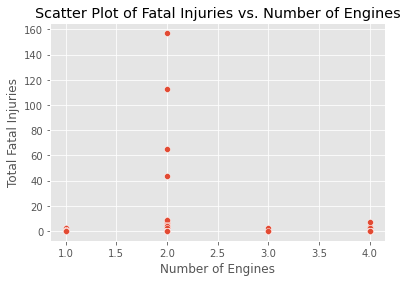

In [58]:
# Scatter plot of 'total_fatal_injuries' against 'number_of_engines'
sns.scatterplot(x='number_of_engines', y='total_fatal_injuries', data=df)

plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.title('Scatter Plot of Fatal Injuries vs. Number of Engines')
plt.show()

In [59]:
from scipy.stats import pearsonr

# Calculating Pearson's correlation coefficient
corr_coefficient, p_value = pearsonr(df['total_minor_injuries'].dropna(), df['total_serious_injuries'].dropna())

print(f"Pearson's Correlation Coefficient: {corr_coefficient}, P-value: {p_value}")

Pearson's Correlation Coefficient: 0.5654630769449023, P-value: 1.6807102743382414e-74


In [60]:
df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,Accident,2000-02-16,"RANCHO CORDOVA, CA",United States,Fatal(3),Destroyed,Airplane,Douglas,DC-8-71F,No,4,Turbo Fan,Unknown,3.0,0.0,0.0,0.0,VMC,Takeoff
1,Accident,2000-03-05,"BURBANK, CA",United States,Non-Fatal,Destroyed,Airplane,Boeing,737-300,No,2,Turbo Fan,Unknown,0.0,2.0,42.0,98.0,VMC,Landing
2,Accident,2000-04-05,"MARIANNA, FL",United States,Fatal(3),Destroyed,Airplane,Learjet,35A,No,2,Turbo Fan,Instructional,3.0,0.0,0.0,0.0,VMC,Approach
3,Incident,2000-04-30,"DENVER, CO",United States,Incident,Unknown,Airplane,British Aerospace,BAE 146-200,No,4,Turbo Fan,Unknown,0.0,0.0,0.0,20.0,IMC,Cruise
4,Accident,2000-12-27,"Boston, MA",United States,Non-Fatal,Unknown,Airplane,Boeing,767-300ER,No,2,Turbo Fan,Unknown,0.0,1.0,0.0,79.0,VMC,Taxi


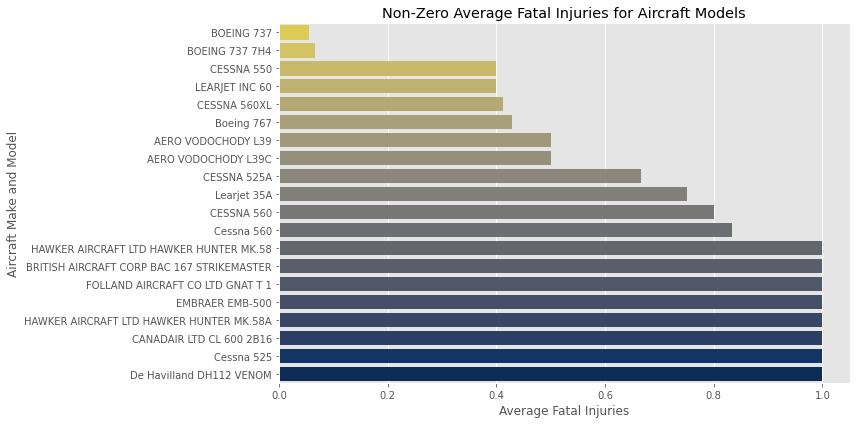

In [61]:
df['make_model'] = df['make'] + " " + df['model']

# Filter out the make and models with zero average fatal injuries
non_zero_avg_fatal = df.groupby('make_model')['total_fatal_injuries'].mean().reset_index()
non_zero_avg_fatal = non_zero_avg_fatal[non_zero_avg_fatal['total_fatal_injuries'] > 0]

non_zero_avg_fatal_sorted = non_zero_avg_fatal.sort_values('total_fatal_injuries', ascending=True)

palette = sns.color_palette("cividis_r", len(non_zero_avg_fatal_sorted.head(20)))

plt.figure(figsize=(12, 6))
sns.barplot(
    x='total_fatal_injuries', 
    y='make_model', 
    data=non_zero_avg_fatal_sorted.head(20),
    palette=palette
)
plt.title('Non-Zero Average Fatal Injuries for Aircraft Models')
plt.xlabel('Average Fatal Injuries')
plt.ylabel('Aircraft Make and Model')
plt.tight_layout()
plt.show()


In [62]:
print(non_zero_avg_fatal_sorted)

                                     make_model  total_fatal_injuries
87                                   BOEING 737              0.055556
95                               BOEING 737 7H4              0.066667
259                                  CESSNA 550              0.400000
418                              LEARJET INC 60              0.400000
262                                CESSNA 560XL              0.411765
222                                  Boeing 767              0.428571
4                            AERO VODOCHODY L39              0.500000
5                           AERO VODOCHODY L39C              0.500000
256                                 CESSNA 525A              0.666667
423                                 Learjet 35A              0.750000
261                                  CESSNA 560              0.800000
283                                  Cessna 560              0.833333
390     HAWKER AIRCRAFT LTD HAWKER HUNTER MK.58              1.000000
198  BRITISH AIRCRAF

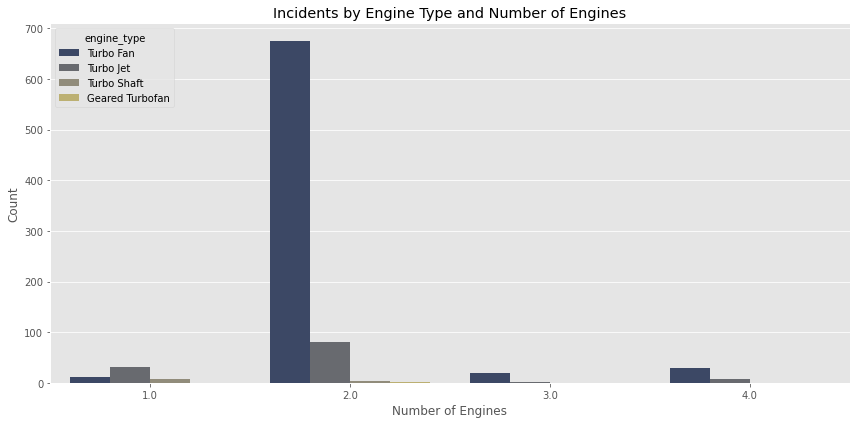

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='number_of_engines', hue='engine_type', palette='cividis')
plt.title('Incidents by Engine Type and Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Count')
plt.tight_layout()


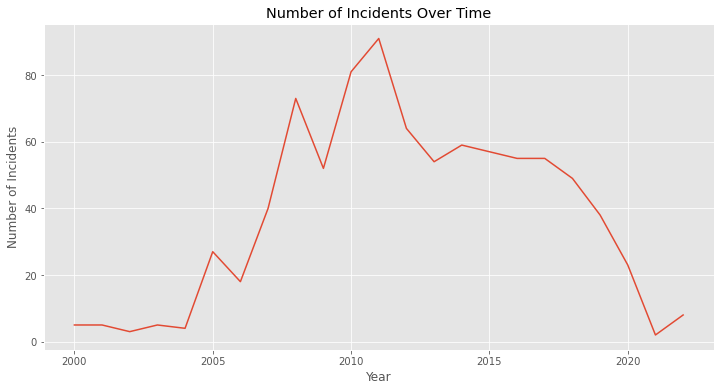

In [64]:
incidents_per_year = df.groupby(df['event_date'].dt.year).size()

# Plot
plt.figure(figsize=(12, 6))
incidents_per_year.plot(kind='line')
plt.title('Number of Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()


In [70]:
incident_count = df.groupby('make_model').size().reset_index(name='incident_count')
incident_count_sorted = incident_count.sort_values('incident_count', ascending=True)

incident_count.head(25)


,make_model,incident_count
0,AERO VODOCHODY L 39,1
1,AERO VODOCHODY L 39C,1
2,AERO VODOCHODY L-29,1
3,AERO VODOCHODY L-39,1
4,AERO VODOCHODY L39,2
5,AERO VODOCHODY L39C,4
6,AEROVODOCHODY L 29 DELFIN,1
7,AEROVODOCHODY L-29 DELFIN,2
8,AIR TRACTOR INC AT 802,1
9,AIRBUS 320,2


In [71]:
severity_count = df.groupby(['make_model', 'injury_severity']).size().unstack(fill_value=0)
severity_count_normalized = severity_count.div(severity_count.sum(axis=1), axis=0)

severity_count.head(25)

injury_severity,Fatal,Fatal(1),Fatal(113),Fatal(2),Fatal(3),Fatal(4),Fatal(6),Fatal(65),Incident,Minor,Non-Fatal,Serious
make_model,,,,,,,,,,,,
AERO VODOCHODY L 39,0,0,0,0,0,0,0,0,0,0,1,0
AERO VODOCHODY L 39C,1,0,0,0,0,0,0,0,0,0,0,0
AERO VODOCHODY L-29,1,0,0,0,0,0,0,0,0,0,0,0
AERO VODOCHODY L-39,1,0,0,0,0,0,0,0,0,0,0,0
AERO VODOCHODY L39,1,0,0,0,0,0,0,0,0,0,1,0
AERO VODOCHODY L39C,2,0,0,0,0,0,0,0,0,0,2,0
AEROVODOCHODY L 29 DELFIN,0,0,0,0,0,0,0,0,0,0,1,0
AEROVODOCHODY L-29 DELFIN,1,0,0,0,0,0,0,0,0,0,1,0
AIR TRACTOR INC AT 802,0,0,0,0,0,0,0,0,0,0,1,0


In [73]:
engine_reliability = df.groupby(['engine_type', 'make_model']).size().reset_index(name='incident_count')
engine_reliability_sorted = engine_reliability.sort_values('incident_count', ascending=True)

engine_reliability.head(25)

,engine_type,make_model,incident_count
0,Geared Turbofan,AIRBUS A220,1
1,Turbo Fan,AERO VODOCHODY L 39C,1
2,Turbo Fan,AERO VODOCHODY L-39,1
3,Turbo Fan,AERO VODOCHODY L39,2
4,Turbo Fan,AERO VODOCHODY L39C,1
5,Turbo Fan,AIR TRACTOR INC AT 802,1
6,Turbo Fan,AIRBUS 320,2
7,Turbo Fan,AIRBUS 321,1
8,Turbo Fan,AIRBUS 330,1
9,Turbo Fan,AIRBUS A220,1


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***